In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from spacy.lang.cs import Czech, STOP_WORDS
import seaborn as sns
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import re
import spacy

In [2]:
czech_data = pd.read_json('X:\Data\BP\czechData.json', dtype={'text':str,'id':str,'title':str}, encoding='utf-8')

In [3]:
czech_data.drop(['date'], axis=1, inplace=True)

In [4]:
czech_data.head()

,text,id,title
0,Příchod nové evropské měny o půlnoci na 1. led...,d1,\n304 miliony lidí ve 12 zemích si začalo vymě...
1,Česká republika se sice zatím k jednotné evrop...,d14000,
2,"V době, kdy eurobankomaty už několik hodin vyd...",d2,
3,"Jak na Nový rok, tak po celý rok. Platí-li zná...",d3,\nDva na jednoho. Zeman a Klaus ve svém prvním...
4,V první vteřině roku 2002 se v havlíčkobrodské...,d14001,


In [5]:
czech_data = czech_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [6]:
czech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81735 entries, 0 to 81734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    81735 non-null  object
 1   id      81735 non-null  object
 2   title   81735 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [7]:
print('Počet netextových buněk v text sloupci ' + str(len(czech_data.loc[czech_data['text'].astype(str).str.isnumeric()])))
print('Počet netextových buněk v id sloupci ' + str(len(czech_data.loc[czech_data['id'].astype(str).str.isnumeric()])))
print('Počet netextových buněk v title sloupci ' + str(len(czech_data.loc[czech_data['title'].astype(str).str.isnumeric()])))

Počet netextových buněk v text sloupci 0
Počet netextových buněk v id sloupci 0
Počet netextových buněk v title sloupci 0


In [8]:
for col in czech_data:
    czech_data[col] = czech_data[col].astype(str)
    czech_data[col] = czech_data[col].map(lambda x: re.sub(r'\W+', ' ', x))
    czech_data[col] = czech_data[col].map(lambda x: re.sub(" \d+", '', x))

In [9]:
czech_data.head()

,text,id,title
0,příchod nové evropské měny o půlnoci na leden ...,d1,miliony lidí ve zemích si začalo vyměňovat sv...
1,česká republika se sice zatím k jednotné evrop...,d14000,
2,v době kdy eurobankomaty už několik hodin vydá...,d2,
3,jak na nový rok tak po celý rok platí li známé...,d3,dva na jednoho zeman a klaus ve svém prvním s...
4,v první vteřině roku se v havlíčkobrodské nemo...,d14001,


In [10]:
print('Počet prázdných buněk v text sloupci ' + str(len(czech_data.loc[(czech_data['text'].str.len() == 0)])))
print('Počet prázdných buněk v id sloupci ' + str(len(czech_data.loc[(czech_data['id'].str.len() == 0)])))
print('Počet prázdných buněk v title sloupci ' + str(len(czech_data.loc[(czech_data['title'].str.len() == 0)])))

Počet prázdných buněk v text sloupci 0
Počet prázdných buněk v id sloupci 0
Počet prázdných buněk v title sloupci 12840


In [11]:
print('Počet krátkých textů v text sloupci ' + str(len(czech_data.loc[czech_data['text'].str.split().map(lambda x: len(str(x))) <= 3])))
print('Počet krátkých textů v title sloupci ' + str(len(czech_data.loc[czech_data['title'].str.split().map(lambda x: len(str(x))) <= 3])))

Počet krátkých textů v text sloupci 0
Počet krátkých textů v title sloupci 12840


In [24]:
czech_data = czech_data.loc[(czech_data['title'].str.len() != 0)]

In [11]:
#czech_data.to_json('X:\Data\BP\czechData_processed.json', orient='records', lines=True, force_ascii=False)

Daty končí úprava dat a pokračuje jen analýza

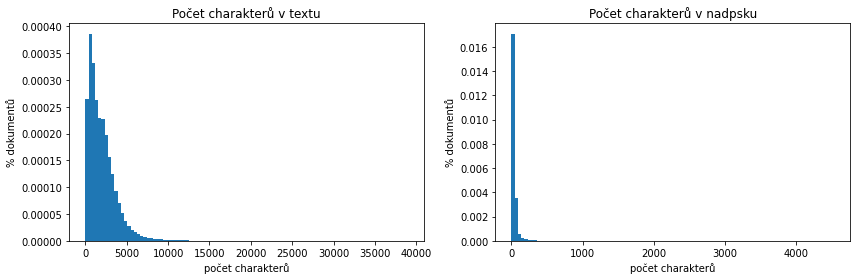

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

axes[0].hist(czech_data['text'].str.len(), bins=100, density=True)
axes[0].set_title('Počet charakterů v textu')
axes[0].set_xlabel('počet charakterů')
axes[0].set_ylabel(f'% dokumentů')

axes[1].hist(czech_data['title'].str.len(), bins=100, density=True)
axes[1].set_title('Počet charakterů v nadpisku')
axes[1].set_xlabel('počet charakterů')
axes[1].set_ylabel(f'% dokumentů')
plt.savefig('C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\pocet_char_cele.svg', dpi=300)

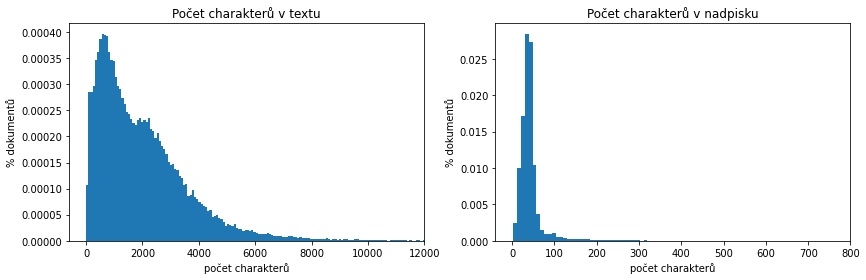

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

axes[0].hist(czech_data['text'].str.len(), bins=500, density=True)
axes[0].set_title('Počet charakterů v textu')
axes[0].set_xlabel('počet charakterů')
axes[0].set_ylabel(f'% dokumentů')
axes[0].set_xlim(xmin=-600, xmax = 12000)

axes[1].hist(czech_data['title'].str.len(), bins=500, density=True)
axes[1].set_title('Počet charakterů v nadpisku')
axes[1].set_xlabel('počet charakterů')
axes[1].set_ylabel(f'% dokumentů')
axes[1].set_xlim(xmin=-40, xmax = 800)
plt.savefig('C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\pocet_char_vyrez.svg', dpi=300)

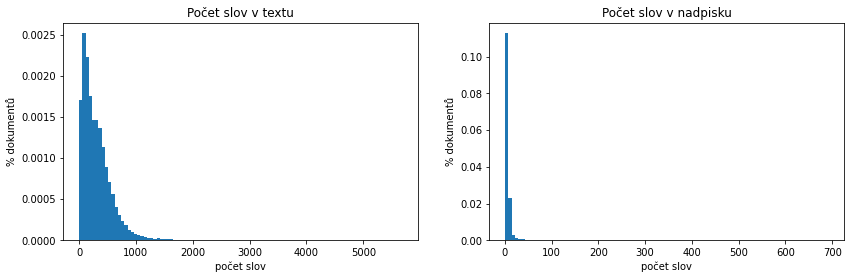

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

axes[0].hist(czech_data['text'].str.split().map(lambda x: len(x)), bins=100, density=True)
axes[0].set_title('Počet slov v textu')
axes[0].set_xlabel('počet slov')
axes[0].set_ylabel(f'% dokumentů')

axes[1].hist(czech_data['title'].str.split().map(lambda x: len(x)), bins=100, density=True)
axes[1].set_title('Počet slov v nadpisku')
axes[1].set_xlabel('počet slov')
axes[1].set_ylabel(f'% dokumentů')
plt.savefig('C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\pocet_slov_cele.svg', dpi=300)

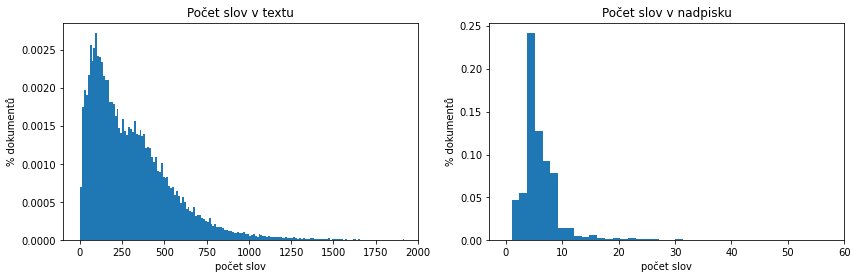

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

axes[0].hist(czech_data['text'].str.split().map(lambda x: len(x)), bins=500, density=True)
axes[0].set_title('Počet slov v textu')
axes[0].set_xlabel('počet slov')
axes[0].set_ylabel(f'% dokumentů')
axes[0].set_xlim(xmin=-100, xmax = 2000)

axes[1].hist(czech_data['title'].str.split().map(lambda x: len(x)), bins=500, density=True)
axes[1].set_title('Počet slov v nadpisku')
axes[1].set_xlabel('počet slov')
axes[1].set_ylabel(f'% dokumentů')
axes[1].set_xlim(xmin=-3, xmax = 60)
plt.savefig('C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\pocet_slov_vyrez.svg', dpi=300)

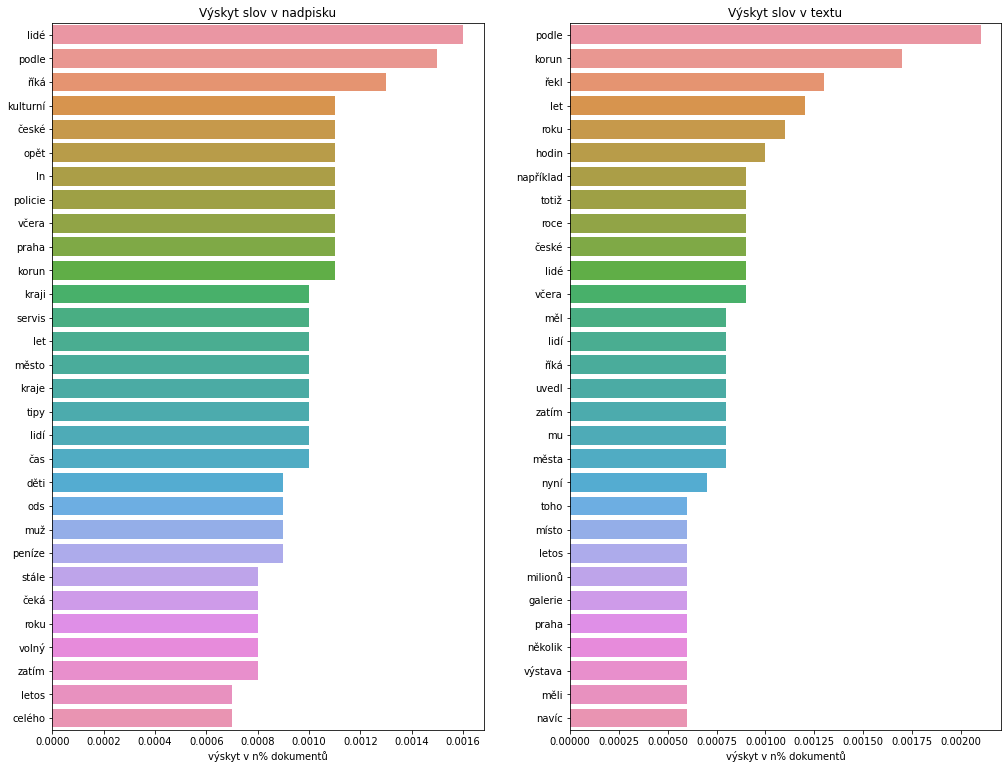

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 13))

news = czech_data['title'].str.split()
words = [item for sublist in news for item in sublist]
counter=Counter(words)
most = counter.most_common()
most = [i for i in most if i[0] not in STOP_WORDS]

total = sum(czech_data['title'].str.split().map(lambda x: len(x)))

x, y= [], []
for word,count in most[:30]:
    x.append(word)
    y.append(round(count/total,4))

sns.barplot(x=y,y=x, ax=axes[0]).set(xlabel=f'výskyt v n% dokumentů', title='Výskyt slov v nadpisku')

news = czech_data['text'].str.split()
words = [item for sublist in news for item in sublist]
counter=Counter(words)
most = counter.most_common()
most = [i for i in most if i[0] not in STOP_WORDS]

total = sum(czech_data['text'].str.split().map(lambda x: len(x)))

x, y= [], []
for word,count in most[:30]:
    x.append(word)
    y.append(round(count/total,4))

ax = sns.barplot(x=y,y=x, ax=axes[1]).set(xlabel=f'výskyt v n% dokumentů', title='Výskyt slov v textu')
plt.savefig('C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\slova_pocet.svg', dpi=300)

In [17]:
def get_top_ngram(corpus, n=None, top_n = 10):
    total = sum(corpus.str.split().map(lambda x: len(x)))
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)/total
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]


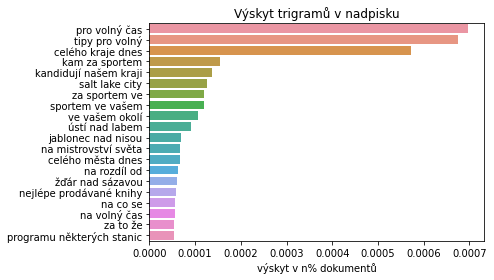

In [18]:
top_tri_grams=get_top_ngram(czech_data['title'],n=3, top_n=20)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.title('Výskyt trigramů v nadpisku')
plt.xlabel(f'výskyt v n% dokumentů')
plt.savefig(r'C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\trigramy_nadpis.svg', dpi=300)

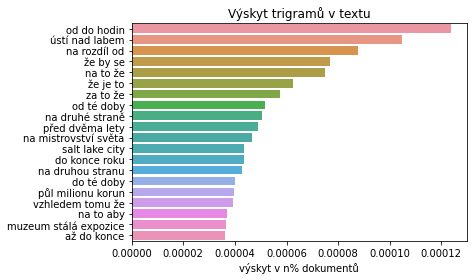

In [19]:
top_tri_grams=get_top_ngram(czech_data['text'],n=3, top_n=20)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.title('Výskyt trigramů v textu')
plt.xlabel(f'výskyt v n% dokumentů')
plt.savefig(r'C:\VisualStudioCode\Python\Škola\BP\other\graphs\czechData\trigramy_text.svg', dpi=300)

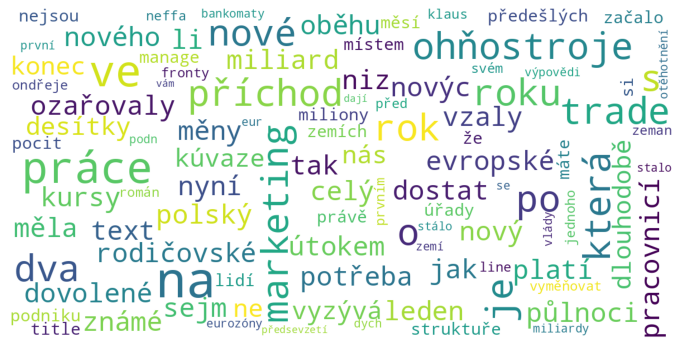

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(czech_data.drop(['id'],axis=1))

In [20]:
from textblob import TextBlob

def polarity(text):
    return TextBlob(text).sentiment.polarity

czech_data['polarity_score_title'] = czech_data['title'].apply(lambda x : polarity(x))
czech_data['polarity_score_text'] = czech_data['text'].apply(lambda x : polarity(x))

In [23]:
len(czech_data['polarity_score_title'].tolist())

68895

(array([4.20930401e-03, 5.80593657e-04, 3.62871036e-03, 6.96712388e-03,
        6.09623340e-03, 8.52021192e-02, 1.40793962e-02, 4.71732346e-02,
        1.21924668e-01, 9.85557733e-02, 8.98962189e+00, 1.99579070e-01,
        7.35902460e-02, 8.43312287e-02, 1.65469192e-02, 1.92031352e-01,
        1.16118731e-02, 1.30633573e-03, 3.20777996e-02, 1.08861311e-02]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

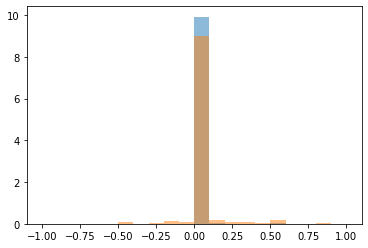

In [22]:
plt.hist(czech_data['polarity_score_title'].tolist(), bins=20, density=True, alpha = 0.5)
plt.hist(czech_data['polarity_score_text'].tolist(), bins=20, density=True, alpha = 0.5)